In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy import special

In [12]:
# lets estimate the parameters for the gamma function from the data
# first by maximum likelihood
def MLE_gamma(data):
    avg = data.mean()
    s = np.log(avg) - np.log(data).mean()
    k0 = (3 - s + np.sqrt((s -3)**2 +24*s))/12/s
#    print("initial guess:",k0)
    for i in range(4):
        k = k0 - (np.log(k0)-special.digamma(k0)-s)/(1/k0-special.polygamma(1,k0))
#        print("next guess:",k)
        k0=k
    return (k,avg/k)



In [13]:
data = pd.read_pickle("data/2018-08-01–115444_event_times.pickle.xz")
tp = np.linspace(0,30,200)

1.04059468361 3.45338652831


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


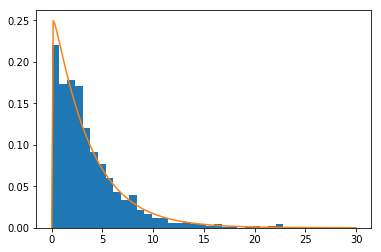

In [17]:
tmrm_ros_delay = np.array(data[data.marker1=="ros"][data.marker0=="tmrm"]["delay"])
tmrm_ros_delay = tmrm_ros_delay[np.logical_not(np.isnan(tmrm_ros_delay))]
tmrm_ros_delay_clean = tmrm_ros_delay[tmrm_ros_delay>0]
plt.hist(tmrm_ros_delay_clean,bins=30,normed=True)

k_tr,theta_tr = MLE_gamma(tmrm_ros_delay_clean)
print(k_tr,theta_tr)
tr_gamma = sps.gamma.pdf(x=tp,a=k_tr,scale=theta_tr)
plt.plot(tp,tr_gamma)

1.04059468361 3.45338652831


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


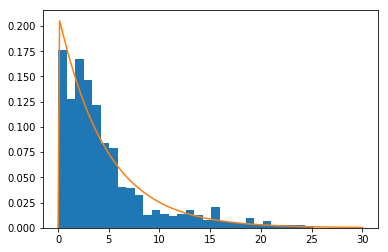

In [18]:
lyso_tmrm_delay = np.array(data[data.marker1=="tmrm"][data.marker0=="lyso"]["delay"])
lyso_tmrm_delay = lyso_tmrm_delay[np.logical_not(np.isnan(lyso_tmrm_delay))]
lyso_tmrm_delay_clean = lyso_tmrm_delay[lyso_tmrm_delay>0]
plt.hist(lyso_tmrm_delay_clean,normed=True,bins=30)

k_lt,theta_lt = MLE_gamma(lyso_tmrm_delay_clean)
print(k_tr,theta_tr)
lt_gamma = sps.gamma.pdf(x=tp,a=k_lt,scale=theta_lt)
plt.plot(tp,lt_gamma)

2.03102121011 3.90140386549


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


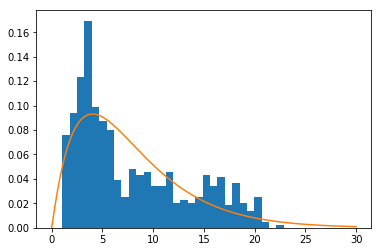

In [24]:
lyso_ros_delay = np.array(data[data.marker1=="ros"][data.marker0=="lyso"]["delay"])
lyso_ros_delay = lyso_ros_delay[np.logical_not(np.isnan(lyso_ros_delay))]
lyso_ros_delay_clean = lyso_ros_delay[lyso_ros_delay>1]

plt.hist(lyso_ros_delay_clean,normed = True,bins=30)

k_lr,theta_lr = MLE_gamma(lyso_ros_delay_clean)
print(k_lr,theta_lr)
lr_gamma = sps.gamma.pdf(x=tp,a=k_lr,scale=theta_lr)
plt.plot(tp,lr_gamma)

In [ ]:
lyso_ros_conv = np.convolve(tmrm_ros_delay)